# Veri bilimi için istatistik

# 1.1.Değişken ve Türleri
Belli bir durumdan veya bir deneyden diğerine farklılık gösteren özelliklere değişken denilmektedir. Değişkenler farklı türlere sahiptir ve genel olarak şu şekilde bir ayrıma tabi tutulabilir:

# 1.1.1. Nicel ve Nitel Değişkenler
Söz konusu değişken sayısal olarak ifade edilebiliyorsa, bu değişkene nicel değişken denilmektedir. Eğer söz konusu değişken sembollerle ifade ediliyorsa, bu değişkene nitel değişken denilmektedir.

# 1.1.2. Sürekli ve Süreksiz Değişkenler
Sürekli değişken, herhangi iki değer arasında sonsuz sayıda değer alabilen değişkendir. Örneğin 0 ile 1 arasında yer alan rasyonel sayılar. Süreksiz değişken ise yine iki değer arasında sınırlı sayıda değer alabilen değişkenlerdir. Örneğin, 10 dakika boyunca bankadaki servis görevlisi tarafından işlemi gerçekleştirilen müşteri sayısı süreksiz değişkendir.

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
## Nitel Değişken
nitel = pd.Series(['a','b','c','d'], dtype="category")
print(nitel)

## Nicel Değişken
nicel=pd.Series([1,3,5,7,9])
print(nicel)

0    a
1    b
2    c
3    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']
0    1
1    3
2    5
3    7
4    9
dtype: int64


# 1.2. Merkezi Eğilim Ölçüleri
Merkezi eğilim aracılığıyla popülasyon içerisinde bulunan bir değişkenin aldığı değerlerin toplandığı merkezi değer gösterilir. En temel merkezi eğilim ölçüleri ortalama (mean ya da average), medyan (median) ve mod (mode)'dur.

Diğer taraftan, dağılım ölçüleri ise değişkenin sahip olduğu değerlerin birbirinden ne kadar farklı olduğunun bir ölçüsüdür. En sık kullanılan dağılım ölçüleri ise, varyans (variance), standart sapma (standard deviation) ve standart hatadır (standard error).

Değişken ile yapılan her birim ölçüm bir veri noktasıdır (data point).


In [2]:
df = pd.DataFrame()

# Daha önce oluşturulan boş veri çerçevesine veri tanımlayalım
df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]

# Normal Dağılımdan rastgele sayı seçelim
rassal=np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
print(rassal[0:10])
print(rassal.shape)

[61.88664116 66.92702481 60.66890811 91.61792992 72.81438976 66.93077922
 79.88085866 63.82795283 73.55932593 61.25696218]
(200,)


# 1.2.1. Ortalama
Ortalama bir değişkenin tüm değerlerinin toplamının alınması ve sonrasında da gözlem sayısına bölünmesiyle bulunan sayıdır. Aynı zamanda değişkenin beklenen değeri olarak da tanımlanır.

In [3]:
# Hazır (built-in) Python fonksiyonları kullanarak ortalama hesaplama
sum(df['age']) / len(df['age'])

sum(rassal)/len(rassal)

print(np.mean(df['age']))
print(np.mean(rassal))

35.25
66.63639779167568


# 1.2.2. Medyan
Medyan veriler küçükten büyüğe dizildiğinde ortadaki değerdir. Eğer tek sayıda değer varsa ortadaki değer medyandır, eğer çift sayıda değer varsa ortadaki iki değerin ortalamasıdır.

In [4]:
# Python'ın statistics modülünü yüklüyoruz
import statistics

print(statistics.median(df['age']))

# veya numpy ile
# numpy'ı yukarıda yüklemiştik
print(np.median(df['age']))

35.0
35.0


# 1.2.3. Mod
Mod değerler arasında en sık geçen değeri gösterir. Diğer bir değişle, mod analizi ile veride birden fazla kümelenme olup olmadığı tespit edilir. Eğer iki veya daha fazla değer aynı sayıda tekrar ederse çift mod oluşacaktır. Aşağıdaki kodu çift mod içeren bir veri ile çalıştırsaydınız hata alabilirdiniz. Aşağıdaki kod istisnalar oluşturmadan çift modlu verileri ele alabilecektir, fakat siz ilk modu alacaksınız.

In [5]:
statistics.mode(df['age'])

35

In [6]:
print(*df.age)

# Veride setinde en çok tekrar  sayının bulunması
(values, counts) = np.unique(df['age'], return_counts=True)

# En fazla tekrara eden elemeanların listelenmesi 
ind = np.argmax(counts)

# The most frequent element.
values[ind]

28 42 27 24 35 54 35 37


35

Yanlılık (bias) hakkında bir not: Örneklemden hesaplanan ortalama, medyan ve mod popülasyon hakkında tarafsız (yanlı olmayan) bir tahmin olarak düşünülür. Bir tahmin tarafsız ise, örnek popülasyonu en iyi şekilde temsil eder. Taraflı bir gözlem ise popülasyon değerinin ya üstünde ya da altında bir değere yaklaşım gösterecektir. Yanlılık kısaca şu şekilde ifade edilebilir:

Yanlılık= Örneklem Ortalaması-Popülasyon Ortalaması

Tarafsız tahmin kullanışlıdır, daha büyük bir grup hakkında genelleme yapabilmek için küçük bir grup üzerinde gözlem yapabilmemizi sağlar. Bu derste gösterdiğimiz uygulamalar aslında örneklem üzerinde yapılmış çalışmalar. Örneklem ve popülasyon üzerinde bu bölümün son dersinde duracağımız için bu küçük notu kısa kesiyoruz.

# 1.3. Dağılım Ölçüleri

## 1.3.1. Varyans
Merkezi eğilimi ölçmek önemli olsa da bir değişkeni anlamak için tek başına yeterli değildir. Bunun için dağılım ölçülerine de başvurmak gerekmektedir. Bir değişkeni anlamak için bakmamız gereken diğer bir önemli gösterge ise varyans'tır.

Bir değişkenin varyansı, değerlerin merkezi eğilimden ne kadar farklılaştığını ve her bir değerin bir başkasından ne kadar farklılaştığını tanımlar. Bir değişkende tüm değerler merkezi eğilime yakınsa varyans çok küçük olacaktır. Eğer değerler merkezi eğilimden uzakta bulunuyorlarsa varyans çok yüksek olacaktır.

Varyansı anlamanın bir diğer yolu ise şudur: Varyans, değişken içinde her bir veri noktası ne kadar değerlidir işte bunun hakkında bir ipucu verir. Eğer varyans düşükse birçok veri noktası merkezi eğilim ile benzerdir, bu nedenle her bir veri noktası ölçüm yapılan kavram hakkında çok az farklı bilgi verebilir. Eğer varyans yüksekse, her bir veri noktası ölçüm hakkında yeni ve farklı bilgiler sunabilecektir.

Birçok insan ortalamayı bulup onun üzerinde çalışma yaparken, veri bilimciler genellikle varyans üzerinde çalışırlar. Çünkü veri bilimciler araştırma konusu değişkenin neden birbirinden farklı davrandığını anlamaya çalışırlar:

Neden bu mağazanın kazanç marjı diğerlerinden çok yüksek?
Neden bu ilacın yan etkileri diğer emsal ilaçlara göre çok daha az?
Neden bazı müşteriler şirketin web sitesinde daha fazla zaman geçiriyorlar? gibi sorular aslında varyansla ilgilidir.
Yüksek varyansa sahip bir değişken gözlemler hakkında farklılıkları ele verir, bu sayede veri bilimciler gelecek çıktıları anlamak için bunları kullanırlar.

Varyansın hesaplanması ile ilgili iki gariplik var. Neden farkın karesi alınıyor ve neden n ‘e değilde (n-1)’e bölünüyor.

İlk soruya cevap olarak, ortalamaya göre sadece farkları alınsaydı toplamı sıfır olurdu çünkü yarısı negatif, yarısı pozitif olacaktı. Karesini alarak negatif değerleri kullanışlı hale getiriyoruz. Tabi ki mutlak değeri alarak hesaplayabilirdik, bu sayede negatif değerleri kullanabilirdik. Karesini almanın başka matematiksel faydaları var bunu sonra tartışacağız. Neden 
n
−
1
 aldığımızın cevabı ise yanlılıkla (bias) alakalı olduğundan şimdilik tartışmasına girmiyoruz.

In [7]:
# Bir verinin varyansını 
# NumPy ve Pandas ile  hesaplayabiliriz. 
print(np.var(df['age'], ddof=1))
print(df['age'].var())


92.5
92.5


# 1.3.2. Standart Sapma
Değişkenliği ölçmekte en çok kullanılan göstergelerden birisi varyansın karekökünün alınmasıdır, buna standart sapma adını veririz. Varyansın karekökünün alınmasının matematiksel bazı faydaları var fakat bunu ileriki derslerde merkezi limit teoremini anlatırken daha ayrıntılı göreceğiz.

Numpy bize std() fonksiyonu ile standart sapmayı verir. Popülasyonun standart sapmasını hesaplarken Numpy’ın aldatıcı bir nüansı vardır. N-1 ile bölmek yerine n ile böler. Popülasyonun standart sapmasını hesaplamak için manuel olarak ddof (degrees of freedom-serbestlik derecesi) parametresine ihtiyaç duyarız:

In [8]:
np.std(df['age'], ddof=1)

9.617692030835672

In [9]:
df['age'].std()

9.617692030835672

# 1.3.3. Standart Hata
Verideki değişkenliğin tespitinde sıklıkla kullanılan diğer bir gösterge ise standart hatadır. Standart hata örneklem ortalamasının belirsizliğinin bir ölçüsüdür. Standart sapma bize varyans hakkında bilgi verirken, standart hata bize ortalama hakkında bilgi verir.

Anket sonuçları standart hata kullanımı için güzel bir örnektir. Genellikle hata marjı olarak bilinir. Örneğin bir anket sonucu %44 ‘ün X ‘i desteklediğini söyler ve %3 standart hata olabileceğini söyler. Diğer bir deyişle seçim bittiğinde sonuçlar %41 ile %47 arasında olabilir demektir. Standart hata ne kadar küçük olursa ortalamanın bize daha kesin ölçüldüğünü anlatır.



In [10]:
df['age'].std() / np.sqrt(len(df['age']))

3.4003676271838605

In [11]:
from scipy import stats
stats.sem(df['age']) # stats kütüphanesi ile hesaplama

3.4003676271838605

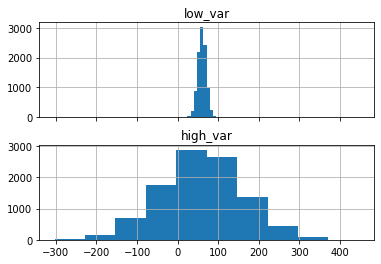

low_var      94.999178
high_var    447.025921
dtype: float64
low_var      16.379086
high_var   -303.352247
dtype: float64


In [12]:
import matplotlib.pyplot as plt

# Veri Çerçevesi
pop=pd.DataFrame()

# Ortalaması 60, standart sapması 10 ve 100 olan iki değişkenin oluşturulması
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# İki değiken için ayrı ayrı histogram oluşturulması
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# her değişkenin minimum ve maksimum değerlerinin bulunması
print(pop.max())
print(pop.min())

Yüksek varyansa sahip değişkeni daha düşük varyanslı değişkenle kıyaslayalım. Görüldüğü gibi, yüksek varyansa sahip popülasyon daha yayılmış bir görünüm sergilemektedir. Bu durum, bu popülasyonun sağ ve sol kuyruklarda daha fazla değer aldığını göstermektedir. Eğer bu değişkenler bizim çalışmak istediğimiz iki popülasyonun değeri olsaydı, her birinden örneklem alacaktık, bu örneklem üzerinden genelleme yapacaktık. Şimdi bunu deneyelim:

C:\Users\Emir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


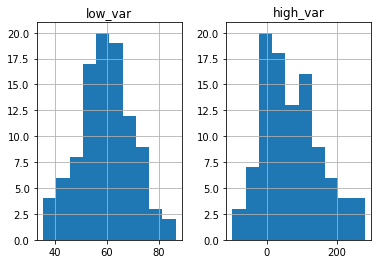

low_var     59.587064
high_var    72.267852
dtype: float64
low_var     10.090655
high_var    85.532817
dtype: float64


In [13]:
# Her bir değişkenden 100 gözleme sahip rassal bir örneklem seçelim ve bunu saklayalım
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var']=np.random.choice(pop['high_var'], 100)

# Görselleştirelim
sample.hist()
plt.show()

# Örneklemin popülasyonu nasıl temsil ettiğini kontrol edelim
print(sample.mean())
print(sample.std(ddof=1))

Örneklem popülasyondan rastgele seçildiği için, kodu her seferinde tekrar çalıştırabilir ve yeni örneklem üzerinde deneyebilirsiniz. Birkaç kere denemenizi tavsiye ederiz. Düşük değişkenliğe sahip örneklemin popülasyon ortalamasına ve standart sapmasına, yüksek değişkenliğe sahip örneklemden daha yakın olduğunu göreceksiniz.

Popülasyondan her örneklem seçildiğinde, dağılımın en uç noktalarından değerler (outlier) çekme ihtimalimiz var. En uç noktalardan değer almak örneklemin ortalamasını popülasyon ortalamasından uzaklaştırabilir. Bu yüzden yüksek değişkenlikli değişkenlerin düşüklere göre ortalamadan uzaklaşma potansiyelleri daha fazladır. Bu sorunu mümkün olduğunca örneklem sayısını artırarak giderebiliriz

# İçerik - Temel İstatistik Kavramları

In [14]:
#numpy kütüphanesini kullanarak üreteceğiniz 3 farklı veri aracılığı ile merkezi eğilim ve dağılım ölçümlerini hem yukarıda verilen matematiksel formülle hem de python'da hazır bulunan (built-in) kodlar aracılığıyla analiz edin!!!
import numpy as np
rassal1 = np. random.randint(100, size=100)
rassal2 = np. random.randint(100, size=100)
rassal3 = np. random.randint(100, size=100)

In [15]:
#ortalama
print(sum(rassal1) / len(rassal1))
print(np.mean(rassal1))
print(sum(rassal2) / len(rassal2))
print(np.mean(rassal2))
print(sum(rassal3) / len(rassal3))
print(np.mean(rassal3))

44.24
44.24
48.61
48.61
51.81
51.81


In [16]:
#Median 
def median(rassal):
    n = len(rassal)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(rassal)[n//2]
    else:
            return sum(sorted(rassal)[n//2-1:n//2+1])/2.0
import statistics
print(median(rassal1))
print(median(rassal2))
print(median(rassal3))
print(statistics.median(rassal1))
print(statistics.median(rassal2))
print(statistics.median(rassal3))


38.0
45.0
56.5
38.0
45.0
56.5


In [17]:
# Mod hesaplama
print(statistics.mode(rassal1))
print(statistics.mode(rassal2))
print(statistics.mode(rassal3))

48
37
73


In [18]:
#Varyans Hesaplama
print(rassal1.var())
print(sum((rassal1 -np.mean(rassal1))**2) / (len(rassal1)))
print(rassal2.var())
print(sum((rassal1 -np.mean(rassal1))**2) / (len(rassal1)))
print(rassal3.var())
print(sum((rassal1 -np.mean(rassal1))**2) / (len(rassal1)))

795.5624000000003
795.5624000000003
918.0579000000002
795.5624000000003
949.6538999999998
795.5624000000003


In [19]:
#Standard Sapma
def standartSapma(vektor):
    sd = 0.0 # standart sapma
    veriAdedi = len(vektor)
    if veriAdedi <= 1:
        return 0.0
    else:
        for _ in vektor:
            sd += (float(_) - np.mean(vektor)) ** 2
        sd = (sd / float(veriAdedi)) ** 0.5
        return sd
print(standartSapma(rassal1))
print(np.std(rassal1))
print(standartSapma(rassal2))
print(np.std(rassal2))
print(standartSapma(rassal3))
print(np.std(rassal3))

28.20571573280849
28.20571573280849
30.299470292399505
30.299470292399505
30.816455020005137
30.816455020005137


In [20]:
#Standart Hata 
print(np.std(rassal1) / np.sqrt(len(rassal1)))
print(np.std(rassal2) / np.sqrt(len(rassal2)))
print(np.std(rassal3) / np.sqrt(len(rassal3)))

2.8205715732808487
3.0299470292399504
3.0816455020005136


# İçerik - Olasılık


## Olasılığa İlişkin Yaklaşımlar
Frekansçı yaklaşım,
Bayesci yaklaşım
## Olasılığa İlişkin Bazı Kavramlar
Rastgelelik,
Seçim Yanlılığı,
Bağımsızlık,
Birleşik Olasılık,
Marjinal Olasılık,
Koşullu Olasılık,

Olasılık, gelecek bir sonucu nicel olarak ifade etmenin bir aracıdır. İnsanlar günlük hayatlarında karar alırken olasılığı yoğun olarak kullanırlar.

# 1. Olasılığa ilişkin yaklaşımlar
## 1.1. Frekansçı yaklaşım
Bu yaklaşıma göre olasılık, bir deney tekrar tekrar yapılırsa bir çıktının kaç kere meydana geleceğini sayılarak buluruz. Örneğin, bir yazı tura oyununda paranın yazı ya da tura gelmesi, yazı tura atmanın defalarca tekrarlanması sonucunda bulunur. Olasılık bilimi açısından bakıldığında bu yaklaşım geleneksel olarak nitelendirilebiliriz. Çünkü, bayesci yaklaşım, modern uygulamaların temelini oluşturmakta ve özellikle yoğun hesaplamaların söz konusu olduğu günümüz uygulamalarına farklı bir yaklaşım getirmektedir.

## 1.2. Bayesci yaklaşım
Bu yaklaşıma göre olasılık, bir gözlemcinin geçmiş tecrübeleri ve bilgisine dayanarak bir olayın meydana gelme ihtimalidir (likelihood). Buna göre, olay her vuku bulduğunda gözlemci de olayın olasılığını gözlemine göre günceller. Olay meydana gelmeden önce gözlemcinin beklediği olasılığa öncül olasılık (prior probability), olay meydana geldikten sonra hesapladığı olasılığa ise artçıl olasılık (posterior probability) denilir.

# 2. Olasılığa ilişkin bazı kavramlar
## 2.1. Rastgelelik
Olasılık kavramı veri bilimi için son derece temeldir. Veri bilimcinin çıkaracağı bilgiler, çoğu zaman bilinmezi ölçebilme kabiliyetine bağlıdır. Yani "yarın yağmur yağabilir" demektense "yarın yağmur yağma olasılığı %65'tir" demek arasında veri bilimi açısından ciddi bir fark bulunur. Üstelik, yağmur yağma olasılığı hakkında bir rakam verirken bu rakamdan ne kadar emin olduğumuz da önemlidir.

Olasılık, rastgelelik dediğimiz kavram açısından da son derece önemlidir. Yazı tura deneyinde olduğu gibi rastgelelik dediğimiz şey, tüm olası çıktıların eşit olasılıkla meydana geldiği durumları ifade eder. Dolayısıyla rastgelelik, bir veri bilimcinin çalışma alanına girer.

Şu gerçeği iyi anlamak gerekir: Üzerinde çalışacağımız verilerin birçoğu popülasyon değil, popülasyondan alınmış örneklemdir. Örneğin, Türkiye'deki tüm kanser hastalarının verisine ulaşmamız mümkün olmayabilir. Fakat, bir hastane verisine erişim sağlamış olabilirsiniz. Dolayısıyla, analizlerinize konu olacak verilerin birçoğu örneklem mahiyetinde olacaktır. Önemli olan, elinizdeki örneklemin gerçek popülasyonu iyi temsil edip etmediğidir.

## 2.2. Seçim Yanlılığı
Örnekleminiz ve gerçek popülasyon arasındaki sistematik farklılıklara seçim yanlılığı (selection bias) denir. Yani örneklemdeki bireyler popülasyonun genelinden farklılık sergilerlerse, örneğin: maddi durumu daha iyi, daha genç, eğitim düzeyi yüksek vs., örneklemde seçim yanlılığı var demektir ve bu örneklem üzerinde yapacağınız analizleri popülasyona genelleyemezsiniz.

Bir başka örnek ise, kumarı ilk kez oynadıkları zaman şanslı olan insanların (beginner's luck) bunu hayatlarının geri kalanı için şanslı olacaklarına dair bir işaret olduğuna inanma eğiliminde olmalarıdır. Bu tür insanların kumar oynamaya bağımlı hale gelme ihtimalinin daha yüksek olduğuna inanılmaktadır.

## 2.3. Bağımsızlık
Olasılık teorisinde, eğer iki olay birbirinden bağımsız olarak meydana geliyorlarsa bunlara bağımsız olaylar deriz. Yani bir olayın sonucu diğer bir olayı hiçbir şekilde etkilemiyorsa bu olaylar bağımsızdır. Örneğin, bir yazı tura oyununda parayı ilk attığınızda gelen değer bir sonraki atışınızda gelecek değeri etkilemez. Dolayısıyla, bu iki olay birbirinden bağımsız olaylardır.

Başka bir örnek olarak, bir torbada 5 kırmızı ve 5 mavi olarak 10 top olduğunu düşünelim. İlk seferde torbadan bir top seçiyor ve rengine bakıyoruz. Daha sonra, çektiğimiz topu tekrar torbaya atıyoruz. A ve B'nin iki farklı olay olduğunu kabul edelim. Eğer A'nın meydana gelmesi B'den bağımsız ise (veya tam tersi) bu durumda A, B'den bağımsızdır denilebilir. Dolayısıyla iki olay birbirinden bağımsız ise aşağıdaki koşulu sağlamalıdır:

## 2.4. Birleşik olasılık
Eğer iki olay birbirinden bağımsız değilse, birleşik (joint) olasılıktan bahsedilir. Birleşik olasılık iki veya daha çok olasılığın kesişimini ifade etmektedir

## 2.5. Marjinal olasılık
A bir olaylar kümesi olsun ve varsayımsal olarak A olayı, B olayından bağımsız olmasın. Bu durumda B olayının gerçekleşme olasılığı temel alınarak A'nın gerçekleşme olasılığına marjinal olasılık denilmektedir.

## 2.6. Koşullu olasılık
A olayının gerçekleşmesi B'nin gerçeklemesini etkilemekte veya tam tersi olarak B olayının gerçekleşmesi, A'nın gerçekleşmesini etkilemekte ise, bu durumda koşullu olasılıktan bahsedilebilir. Daha önce Bayes Teorisinde gördüğümüz formül ile ifade edilen koşullu olasılık B olayı gerçekleştiğinde A'nın gerçekleşme olasılığı olarak özetlenebilir.

A şirketinin sattığı bilgisayarın bazılarının bozuk olduğu tespit edilmiştir. Bilgisyar üreten 3 şirket (A, B ve C) olduğunu varsayımı altında, bu şirketlerin bilgisayar üretim miktarı ve bozuk üretim olasılıkları şu şekildedir:

Toplam Üretim Yüzdesi :

P(A)=0.40

P(B)=0.40

P(C)=0.20

Hatalı Üretim Olasılığı : 

P(D|A)=0.015

P(D|B)=0.020

P(D|C)=0.010

Rastgele seçilen bir bozuk bir bilgisayarın B şirketi tarafından üretilme olasılığı nedir?

In [21]:
#P(B|D)=(P(D|B) * P(B))/P(D)=a*b\c
a=0.40
b=0.02
c=((0.4*0.015+0.4*0.02+0.2*0.01)/1)
print(a*b/c)

0.5


# İçerik - İstatistiksel Dağılımlar


Bir veri bilimci olarak verilerin yapısını incelemek ve bu veriler aracılığıyla tahminde bulunmak için istatistiksel çıkarımları kullanacaksınız. Bu istatistiksel çıkarımları yapabilmek için ise verilerin olasılık dağılımlarını bilmek gerekmektedir. Bir değişkenin dağılımı denilince, verinin alabileceği tüm değerleri ve ne kadar sıklıkla meydana geldiklerini gösteren bir liste, fonksiyon ya da grafik aklımıza gelecektir. Bu bölümde, veri bilimcilerin sıklıkla kullandığı ve veri bilimi uygulamaları için büyük öneme sahip olan bazı dağılımları göreceğiz.

Bir dağılım ile tanımlanması gereken bir veri kümesi üzerinde çalışmaya başladığımızda, elimizdeki ham veriye şu 4 temel soruyu sormalıyız:

Veri kümesi kategorik verilerden mi yoksa sürekli verilerden mi oluşmaktadır?
Veriler simetrik mi dağılmıştır? Başka bir deyişle, ortalamının solundaki ve sağındaki değerler eşit veya eşite yakın mıdır?
Verilerin alabileceği değerlerin üst ya da alt sınırları var mıdır? Örneğin, işsizlik verisinin sıfır değerinin altında bir değer alamayacağı gibi.
Verinin dağılımına bakıldığında aşırı değerler (outliers) gözlemleniyor mu?
Bu soruların cevapları veri kümesinin hangi dağılıma benzediğine dair ipuçları vermektedir. Dolayısıyla veriyi analiz etmeye başlamadan önce veriyi çok iyi tanımalıyız.

İşte olasılık dağılımlarını bilmemiz bize burada çok fayda sağlayacaktır.

Bu derste istatistiksel analizlerde sıklıkla kullanılan aşağıdaki dağılımları tanıyacağız:

Normal (Gaussian) Dağılım,
Bernoulli Dağılımı,
Binom Dağılımı,
Tekdüze (Uniform) Dağılım.


# 1.1. Normal Dağılım
Normal dağılımın istatistikte önemli bir yeri vardır ve en çok kullanılan dağılımdır. Alman matematikçi Carl Friedrich Gauss tarafından bulunduğundan dolayı Gaussian dağılım olarak da adlandırılır. Günlük yaşamda karşılaştığımız bir çok olguyu tanımlamaktadır. Basitçe ifade etmek gerekirse, dağılımda yer alan çoğu değer merkezde kümeleniyorsa ve geri kalanı da simetrik olarak merkezin sağında ve solunda ise "normal" veya "normal olarak dağılmış" olarak tanımlanır.
Normal dağılım iki parametre ile tanımlanır: Ortalama (μ) ve standart sapma (σ). Diğer bir değişle, ortalama ve standart sapma ile normal dağılım tanımlanabilir. 

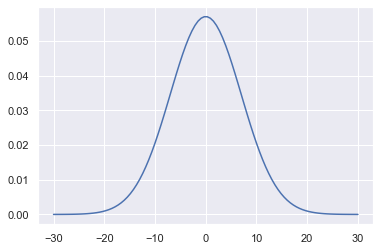

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import seaborn as sns
sns.set()

mu=0
sigma = 7
x = np.linspace(-30, 30, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.show()

Yukarıdaki şekilde görüldüğü gibi, dağılımın ortalaması olan 0.5 civarında simetrik bir dağılım söz konusudur.

Normal dağılım veri bilimcileri için çok önemlidir. Çünkü:

Sadece iki istatistiksel parametre (ortalama (μ) ve standart sapma(σ)) kullanılarak kolayca özetlenebilir.
Eğri altındaki alan 1'dir, bu da dağılımın içindeki birbirinden ayrı sonuçların olasılığını hesaplamayı kolaylaştırır.
Psikoloji, finans gibi birçok alanda veriler normale yakın dağılmaktadır.
Genel olarak, pek çok küçük etkinin sonucunu ölçen herhangi bir değişken tek başına ve bağımsız olarak normal dağılıma yakın olacaktır.
Yaygın göstergelerin birçoğu (z-skor) ve istatistiksel testler (t-testleri, ANOVA'lar, çan eğrisi) verinin normal dağılımı varsayımı üzerine kurulmuştur. Dolayısıyla, normal dağılımın kullanımı kolaydır ve bu nedenle yaygın olarak kullanılır.
μ =1 ve σ=0 olan normal dağılıma, standart normal dağılım denilmektedir.

----------------------------------------------------------------------------------------------------------------------------

İki normal dağılıma sahip rassal sayı üretim. Bu rassal sayılardan birisinden 1000 tane 10.000 tane elde edelim. Bu iki rassal sayının da olasılık yoğunluk grafiğini çizelim. Sizce Merkezi Limit Theoremi bu olayda geçerli midir?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

mu, sigma, n = 10, 0.5, 1000
birinci_rassal_sayi = np.random.normal(mu, sigma, n)

mu, sigma, n = 10, 0.5, 10000
ikinci_rassal_sayi = np.random.normal(mu, sigma, n)



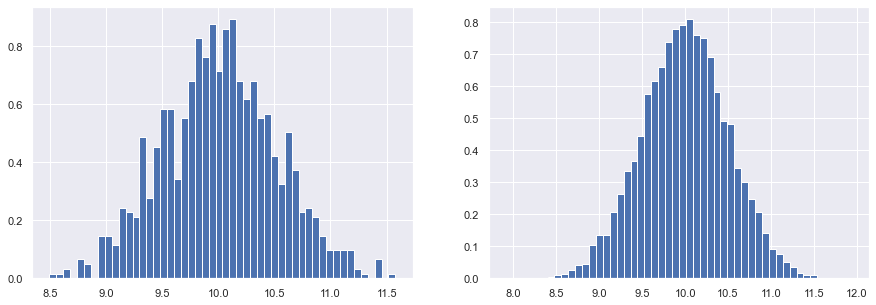

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
count, bins, ignore = plt.hist(birinci_rassal_sayi, 50, density=True)
plt.subplot(122)
count, bins, ignore = plt.hist(ikinci_rassal_sayi, 50, density=True)
plt.show()

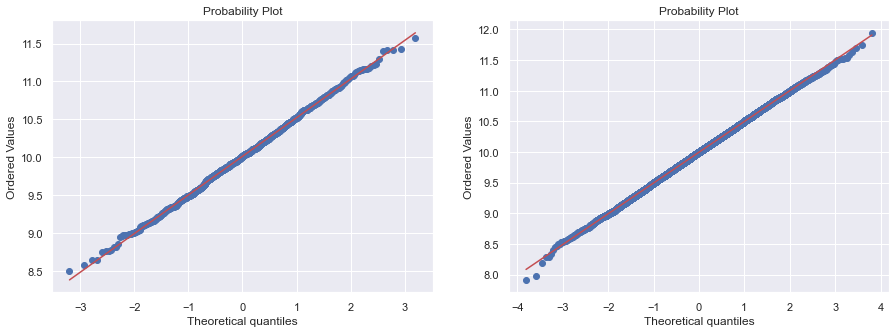

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
res = stats.probplot(birinci_rassal_sayi, plot=plt)
plt.subplot(122)
res = stats.probplot(ikinci_rassal_sayi, plot=plt)
plt.show()

Yukarıda görüldüğü üzere merkezi limit teoremi geçerlidir, fakat örneklemimizi ne kadar yüksek tutarsak sonucu olan etkisi bir o kadar artmaktadır.

İki madeni paramızın olduğunu varsayalım. Bunlardan bir tanesi adil (yani, yeteri kadar deneme yapıldığında yazı veya tura 1/2 olasılığına yaklaşmakta) diğeri ile ise 3/4 olasılığında tura elde edilmektedir.Herhangi biri seçilip, n kere deneme yapıldığında,Sn tura sayısı olursa, Büyük Sayılar Yasası uzun vadede gelecek tura sayısını tahmin etmemize izin verir mi? Çok sayıda deneme yapıldığında, hangi paranın seçildiğini bilebilir miyiz? Kaç deneme bizi %95 oranında emin kılar?

In [27]:
def orneklem_plotla(örneklem_ortalaması,orneklem_sayisi, subplot_no):
    baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
    eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
    plt.subplot(subplot_no)
    plt.plot(örneklem_ortalaması[0:orneklem_sayisi])
    plt.ylim((0,1.2))
    plt.title("Örneklem Sayısı = {}".format(orneklem_sayisi), fontdict = baslik_font)
    plt.xlabel("Para Adedi", fontdict = eksen_font)
    plt.ylabel("Tura Gelme Olasılığı", fontdict = eksen_font)
    return plt

In [28]:
adil_para = np.random.binomial(1,0.5, 100)
yanli_para = np.random.binomial(1,0.75, 100)
print("Adil para : ", sum(adil_para)/len(adil_para))
print("Yanlı para : ", sum(yanli_para)/len(yanli_para))

Adil para :  0.47
Yanlı para :  0.78


In [29]:
örneklem1 = []
örneklem_ortalamaları1 = []
k=[]
s=[]
for i in range(1,100,1):
    atıs = np.random.binomial(i, 0.75, 100)
    p = np.sum((atıs/i)>0.50)/100
    örneklem1.append(atıs)
    örneklem_ortalamaları1.append(p)
    if p>0.95:
        k.append(i)
        s.append(p)

print("{} para ile tura gelme olasığı {} yani %95 den fazla oluyor ".format(k[0],s[0]))

7 para ile tura gelme olasığı 0.96 yani %95 den fazla oluyor 


In [30]:
örneklem2 = []
örneklem_ortalamaları2 = []
k=[]
t=[]
for i in range(1,100,1):
    atıs = np.random.binomial(i, 0.50, 100)
    p = np.sum((atıs/i))/100
    örneklem2.append(atıs)
    örneklem_ortalamaları2.append(p)
    k.append(i)
    t.append(örneklem_ortalamaları2)

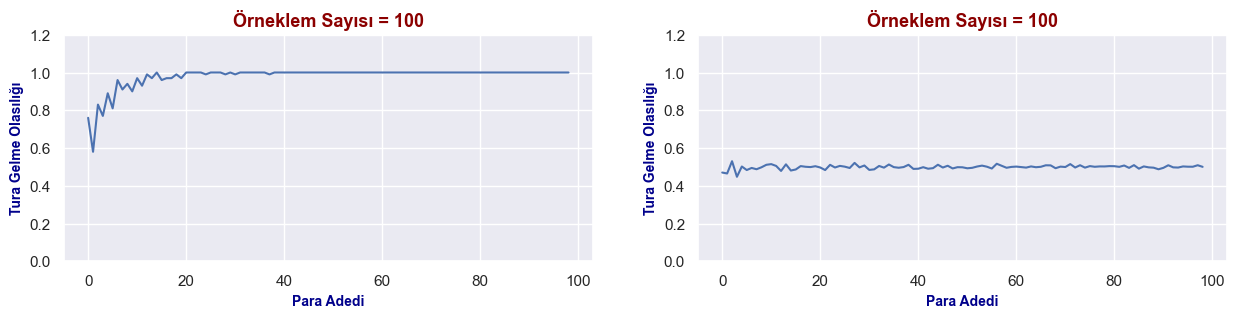

In [31]:
plt.figure(figsize=(15,3), dpi=100)
orneklem_plotla(örneklem_ortalamaları1,100, 121) 
orneklem_plotla(örneklem_ortalamaları2, 100, 122)
plt.show()

s=[]
örneklem_ortalamaları1 = []
örneklem1 = []
for i in range(1,100,1):
    atıs = np.random.binomial(i, 0.75, 100)
    örneklem1.append(atıs)
    p = np.sum((atıs/i))/100
    örneklem_ortalamaları1.append(p)
    s.append(örneklem_ortalamaları1)
s

Büyük sayılar yasası örneklem sayımız arttıkça bizim daha doğru bir tahminde bulunmamızı sağlar. Yeterli sayıda deneme yapıldığı zaman adil parayı mı yoksa adil olmayan parayı mı seçtiğimizi çok rahat bir şekilde elde edebiliriz.

# (1) By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of name_distributionand fill out the bracket with your choice again. Then please,

(a) Draw the histogram and interpret

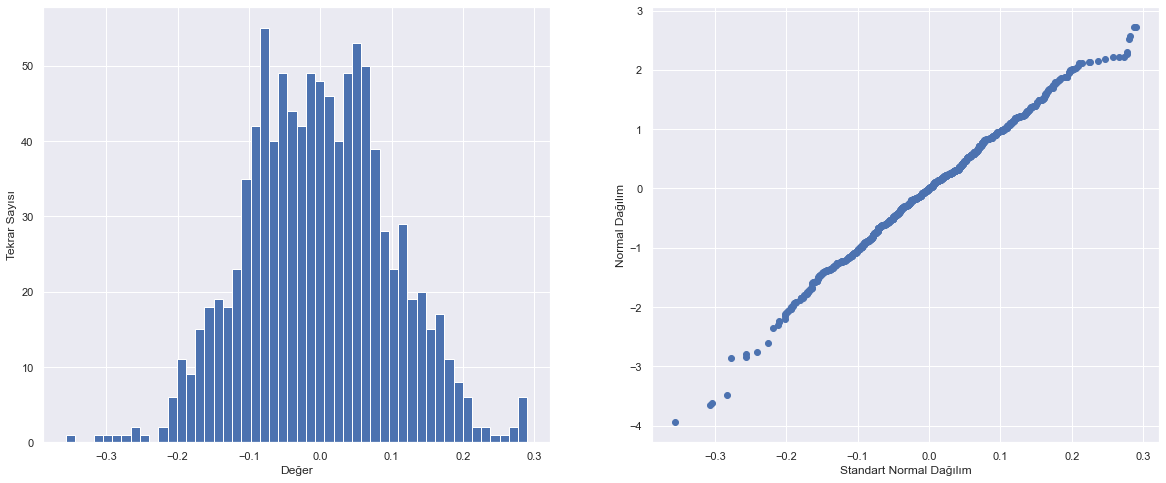

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
standart_normal_dagilimli = np.random.normal(0, 1, 1000)
standart_normal_dagilimli.sort()
mu, sigma = 0, 0.1
distribution=np.random.normal(mu, sigma, 1000)
distribution.sort()
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.hist(distribution, bins = 50)
plt.ylabel('Tekrar Sayısı') 
plt.xlabel('Değer')
plt.subplot(122)
plt.plot(distribution, standart_normal_dagilimli, "o") 
plt.ylabel('Normal Dağılım') 
plt.xlabel('Standart Normal Dağılım')
plt.show()

## Normal dağılım bir dağılım olacak şekilde random değerleri ürettim. Histogramda görüldüğü üzere normal dağılım olduğu görülüyor. Değerler merkezde toplanmış. Q-Q grafiğimiz de, normal dağılımlı değişkenle aynı dağılımı paylaşıyorsa, sonuç sol alt köşeden sağ üst köşeye giden düz bir çizgi olmalıdır ki grafiğimiz de bu tanıma çok yakın.

**(2)** Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

[*********************100%***********************]  1 of 1 completed


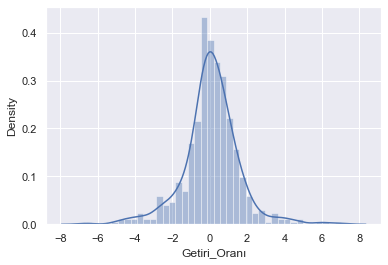

,Open,High,Low,Close,Adj Close,Volume,getiri,fark,Getiri_Oranı
Date,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.459938,115127600,29.037500,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.429203,84472400,29.004999,29.037500,-0.111928
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.568691,88774400,29.152500,29.004999,0.508536
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.876030,127007600,29.477501,29.152500,1.114830
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.131361,134247600,29.747499,29.477501,0.915948
...,...,...,...,...,...,...,...,...,...
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.800995,148676800,36.707500,37.682499,-2.587404
2018-12-26,37.075001,39.307499,36.680000,39.292500,38.322155,234330000,39.292500,36.707500,7.042155
2018-12-27,38.959999,39.192501,37.517502,39.037498,38.073456,212468400,39.037498,39.292500,-0.648982


In [33]:
import pandas as pd
import yfinance as yf
df = yf.download('AAPL',
            start = "2017-01-01",
            end = "2019-01-01", 
            interval='1d', prepost=True)
df2 = df.copy()
df2['getiri'] = df2["Close"]
df2['fark'] = df2["Close"].shift(1)
df2['Getiri_Oranı']= (df2['getiri']-df2['fark'])*100/df2['fark']
df2.head()
import matplotlib.pyplot as plt 
import seaborn as sns
sns.distplot(df2["Getiri_Oranı"].dropna())
plt.show()
df2